<a href="https://colab.research.google.com/github/Jojocko/buzzode/blob/master/ACA_thesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

df = pd.read_csv('/content/drive/My Drive/Datasets NLP/thesis_dataset_colab.csv')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Articles,News source,Share counts,Dataset,Eliteness,Impact,Negativity,Positivity,Personalization,Superlativeness,Timeliness,Unexpectedness
0,Second police officer died by suicide followin...,Regional,43000,USA,1,1,1,0.0,1,1,1,0
1,Rioters breached US Capitol security on Wednes...,Regional,43900,USA,1,0,2,0.0,1,2,1,0
2,‘They Got a Officer!’: How a Mob Dragged and B...,Regional,36300,USA,0,0,2,0.0,1,2,0,0
3,"As the D.C. police clear the Capitol grounds, ...",Regional,36500,USA,1,0,2,0.0,1,1,1,0
4,Now it’s sinking in: Wednesday’s Capitol Hill ...,Regional,40900,USA,1,0,2,0.0,1,3,1,1


In [32]:
df['News source'] = df['News source'].str.strip()
df['Dataset'] = df['Dataset'].str.strip()
df['Positivity'] = df['Positivity'].replace(0.0, 0)

In [33]:
# Calculating metrics for each dataset

stats_df = df.groupby('Dataset')['Share counts'].agg(
    Mean_Shares='mean',
    Median_Shares='median',
    Max_Shares='max'
).reset_index()

stats_df

,Dataset,Mean_Shares,Median_Shares,Max_Shares
0,Benin,14.800000,9.0,55
1,Chad,40.774194,16.5,722
2,Iraq,21.925926,9.0,139
3,Kenya,16.909091,12.0,69
4,Peru,171.333333,28.0,1300
5,USA,56931.578947,49600.0,157100


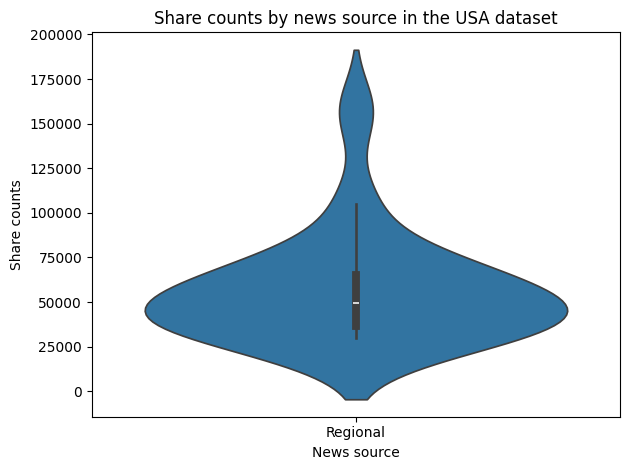

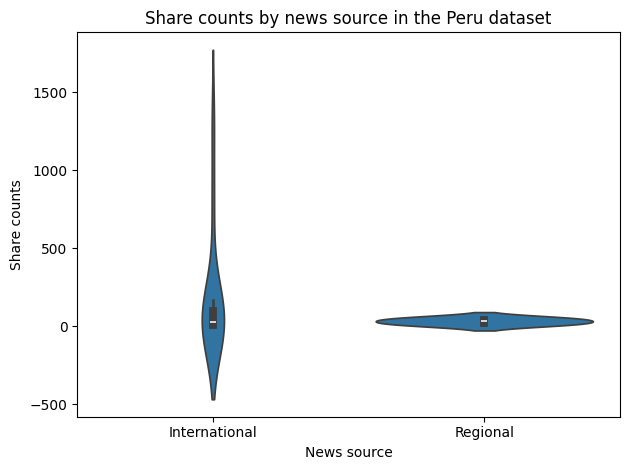

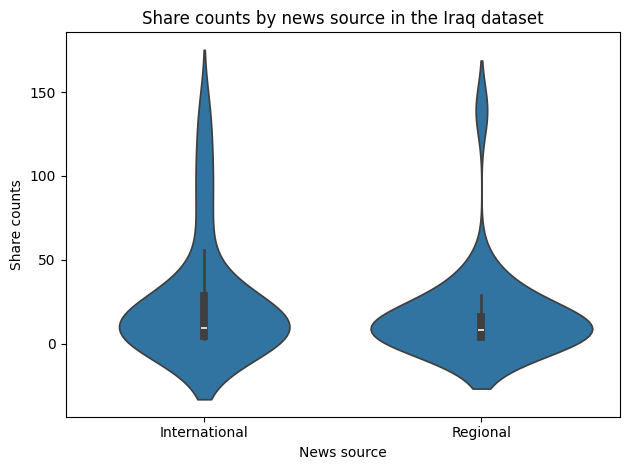

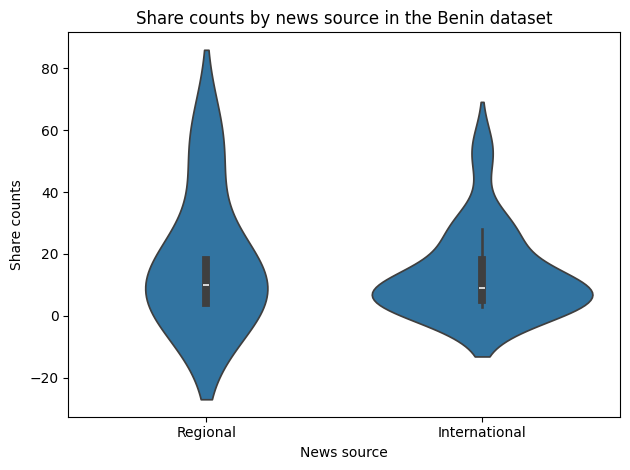

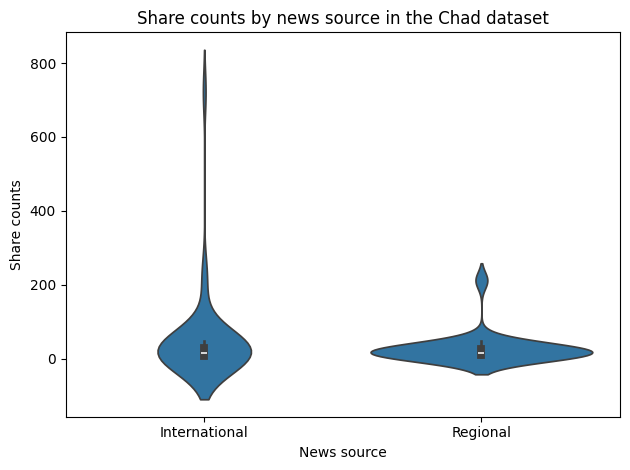

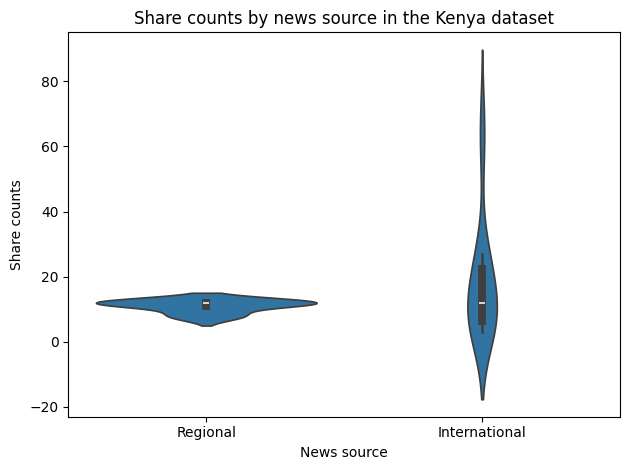

In [37]:
datasets = ['USA', 'Peru', 'Iraq', 'Benin', 'Chad', 'Kenya']

for dataset in datasets:

    subset_df = df[df['Dataset'] == dataset]


    plt.figure()
    sns.violinplot(x='News source', y='Share counts', data=subset_df)
    plt.xticks()
    plt.title(f'Share counts by news source in the {dataset} dataset')
    plt.xlabel('News source')
    plt.ylabel('Share counts')
    plt.tight_layout()
    plt.show()